Derive Spearman  Correlation of CDI and VHI

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

In [129]:
inputfile=r"C:\temp\temp\CDI_VHI_LST_AS_Merged_vegetation.csv"

Read the CSV file
Note: Use ';' as separator since the file uses semicolon delimiter

In [130]:
df = pd.read_csv(inputfile, sep=';', encoding='latin-1')

Define filter for the regions an no data

In [131]:
region_range = [31, 68]
year_range = [2018, 2022]

In [132]:
df_filtered = df[(df['VHI'] != 110) & 
                 (df['Region_ID'].between(region_range[0], region_range[1])) & 
                 (df['Datum'].str[:4].astype(int).between(year_range[0], year_range[1]))]

Calculate Spearman correlation coefficient

In [133]:

correlation, p_value = stats.spearmanr(df_filtered['CDI'], df_filtered['VHI'])

Lienar regression

In [134]:
# Prepare data for linear regression
X = df_filtered['CDI'].values.reshape(-1, 1)
y = df_filtered['VHI'].values

# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate R-squared
r_squared = lin_reg.score(X, y)

# Calculate RMSE
y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

Use a color palette that maximizes color distinction

In [135]:

from matplotlib.colors import hsv_to_rgb

def generate_distinct_colors(n):
    """
    Generate a list of maximally distinct colors
    Uses HSV color space to create perceptually distinct colors
    """
    hue_partition = 1.0 / n
    colors = [hsv_to_rgb((i * hue_partition, 1, 1)) for i in range(n)]
    return colors

Make scatterplot Based on Region

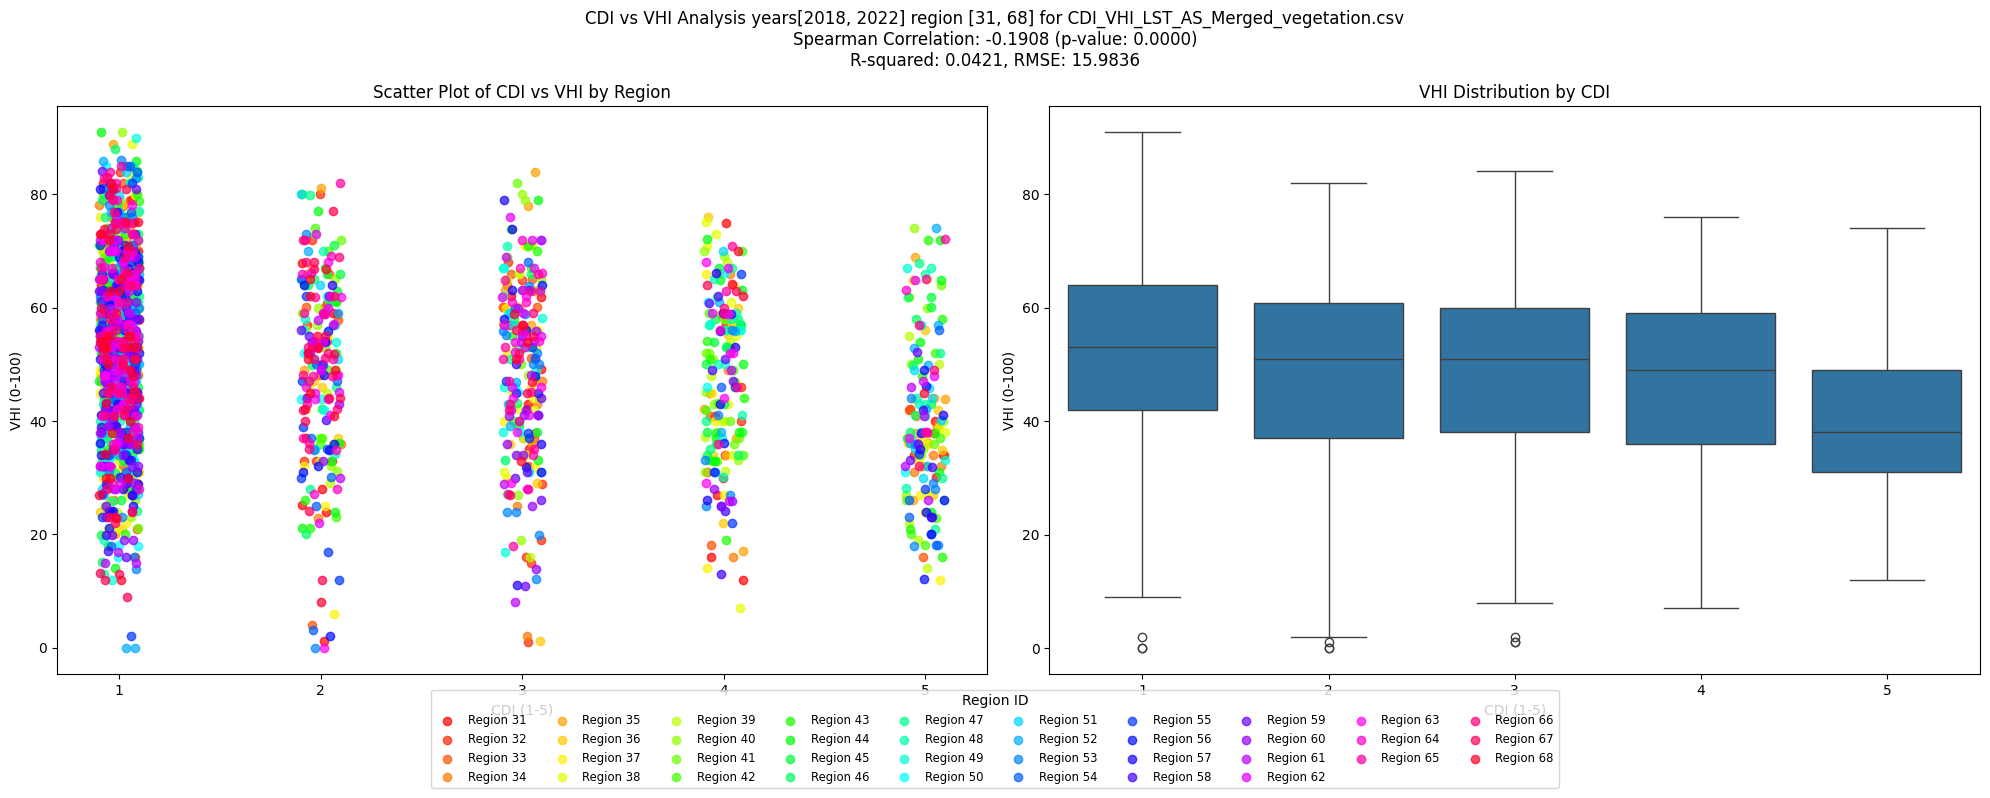

In [136]:
# Create the figure and axes
fig = plt.figure(figsize=(20, 8))

# Create a subplot for the scatter plot
ax1 = plt.subplot(1, 2, 1)
# Get unique Region IDs and create a color palette
unique_regions = df_filtered['Region_ID'].unique()
color_palette = generate_distinct_colors(len(unique_regions))

# Add jitter to CDI and VHI values to prevent overlapping
jitter_amount = 0.1  # Adjust this value to control the amount of jitter

# Use scatter plot with manual color mapping and jittering
for region, color in zip(unique_regions, color_palette):
    subset = df_filtered[df_filtered['Region_ID'] == region]
    # Create jittered values
    jittered_cdi = subset['CDI'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    jittered_vhi = subset['VHI'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    
    ax1.scatter(jittered_cdi, jittered_vhi, 
                label=f'Region {region}', 
                color=color, 
                alpha=0.7)

ax1.set_title('Scatter Plot of CDI vs VHI by Region')
ax1.set_xlabel('CDI (1-5)')
ax1.set_ylabel('VHI (0-100)')

# Create a subplot for the box plot
ax2 = plt.subplot(1, 2, 2)
# Group by CDI and create a box plot of VHI for each CDI category
sns.boxplot(x='CDI', y='VHI', data=df_filtered, ax=ax2)
ax2.set_title('VHI Distribution by CDI')
ax2.set_xlabel('CDI (1-5)')
ax2.set_ylabel('VHI (0-100)')

# Add overall figure title with correlation, R-squared, and RMSE information
plt.suptitle(f'CDI vs VHI Analysis years{year_range} region {region_range} for {os.path.basename(inputfile)}\n'
             f'Spearman Correlation: {correlation:.4f} (p-value: {p_value:.4f})\n'
             f'R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}', 
             fontsize=12)

# Use tight_layout first to properly position the subplots
plt.tight_layout()

# Create a separate legend below both subplots
legend = fig.legend(
    title='Region ID',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.0),
    ncol=min(len(unique_regions), 10),  # Use up to 10 columns or fewer if there are fewer regions
    frameon=True,
    fontsize='small'
)

# Adjust the figure to make room for the legend
plt.subplots_adjust(bottom=0.15)

plt.show()

In [137]:
# Print out additional statistical information
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(df_filtered[['CDI', 'VHI']].describe())

Spearman Correlation Coefficient: -0.19080017330826832
P-value: 4.361514763967203e-18

Descriptive Statistics:
               CDI          VHI
count  2029.000000  2029.000000
mean      1.957615    50.103499
std       1.342735    16.335310
min       1.000000     0.000000
25%       1.000000    38.000000
50%       1.000000    51.000000
75%       3.000000    62.000000
max       5.000000    91.000000


Add Color by year

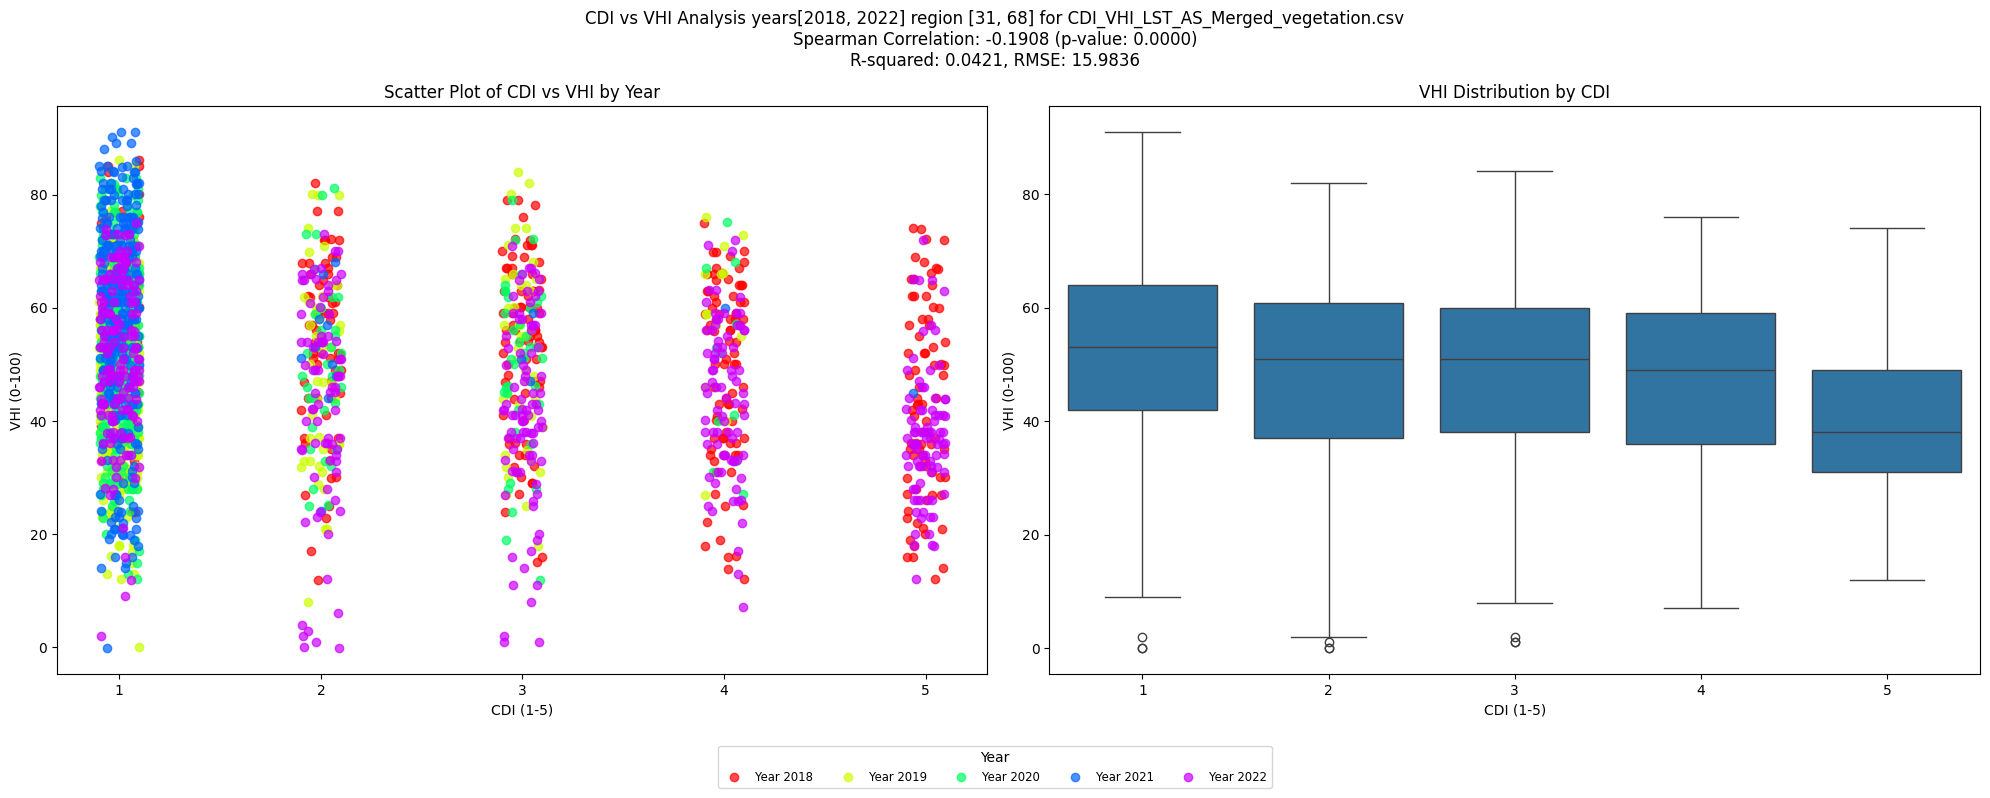

In [138]:
# Create the figure and axes
fig = plt.figure(figsize=(20, 8))

# Create a copy of the filtered DataFrame to avoid warnings
df_year = df_filtered.copy()

# Convert Datum to datetime and extract year
df_year['Year'] = pd.to_datetime(df_year['Datum']).dt.year

# Get unique Years and create a color palette
unique_years = df_year['Year'].unique()
color_palette = generate_distinct_colors(len(unique_years))

# Add jitter to CDI and VHI values to prevent overlapping
jitter_amount = 0.1  # Adjust this value to control the amount of jitter

# Create the subplot for the scatter plot
ax1 = plt.subplot(1, 2, 1)

# Use scatter plot with manual color mapping and jittering
for year, color in zip(unique_years, color_palette):
    subset = df_year[df_year['Year'] == year]
    # Create jittered values
    jittered_cdi = subset['CDI'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    jittered_vhi = subset['VHI'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    
    ax1.scatter(jittered_cdi, jittered_vhi, 
                label=f'Year {year}', 
                color=color, 
                alpha=0.7)

ax1.set_title('Scatter Plot of CDI vs VHI by Year')
ax1.set_xlabel('CDI (1-5)')
ax1.set_ylabel('VHI (0-100)')

# Create a subplot for the box plot
ax2 = plt.subplot(1, 2, 2)
# Group by CDI and create a box plot of VHI for each CDI category
sns.boxplot(x='CDI', y='VHI', data=df_filtered, ax=ax2)
ax2.set_title('VHI Distribution by CDI')
ax2.set_xlabel('CDI (1-5)')
ax2.set_ylabel('VHI (0-100)')

# Add overall figure title with correlation, R-squared, and RMSE information
plt.suptitle(f'CDI vs VHI Analysis years{year_range} region {region_range} for {os.path.basename(inputfile)}\n'
             f'Spearman Correlation: {correlation:.4f} (p-value: {p_value:.4f})\n'
             f'R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}', 
             fontsize=12)

# Use tight_layout first to properly position the subplots
plt.tight_layout()

# Create a separate legend below both subplots
legend = fig.legend(
    title='Year',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.0),
    ncol=min(len(unique_years), 10),  # Use up to 10 columns or fewer if there are fewer years
    frameon=True,
    fontsize='small'
)

# Adjust the figure to make room for the legend
plt.subplots_adjust(bottom=0.15)

plt.show()